In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step 1: Load data

In [160]:
data = pd.read_csv("data/Data.csv")

In [161]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
data.shape

(1782, 12)

## Step 2: Analyse data

In [163]:
data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [164]:
Num_col = [col for col in data.columns if data[col].dtypes != "object"] 

In [165]:
Num_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [166]:
Cat_col = [col for col in data.columns if data[col].dtypes == "object"]

In [167]:
Cat_col

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1782 non-null   int64  
 1   Survived     1782 non-null   int64  
 2   Pclass       1782 non-null   int64  
 3   Name         1782 non-null   object 
 4   Sex          1782 non-null   object 
 5   Age          1605 non-null   float64
 6   SibSp        1782 non-null   int64  
 7   Parch        1782 non-null   int64  
 8   Ticket       1782 non-null   object 
 9   Fare         1782 non-null   float64
 10  Cabin        408 non-null    object 
 11  Embarked     1778 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 167.2+ KB


In [169]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1782.000000,1782.000000,1782.000000,1605.000000,1782.000000,1782.000000,1782.000000
mean,891.500000,0.383838,2.308642,29.511738,0.523008,0.381594,32.204208
std,514.563407,0.486456,0.835836,13.707124,1.102434,0.805831,49.679476
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,446.250000,0.000000,2.000000,21.000000,0.000000,0.000000,7.903100
50%,891.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1336.750000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1782.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [170]:
# Check duplicate

In [171]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1777    False
1778    False
1779    False
1780    False
1781    False
Length: 1782, dtype: bool

In [172]:
# Check unique value

In [173]:
data.nunique()

PassengerId    1782
Survived          2
Pclass            3
Name            891
Sex               2
Age              88
SibSp             7
Parch             7
Ticket          681
Fare            248
Cabin           147
Embarked          3
dtype: int64

In [174]:
# Check NUll values or missing values

In [175]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1374
Embarked          4
dtype: int64

In [176]:
data['Age']= data['Age'].fillna(data['Age'].mean())
data["Embarked"] = data["Embarked"].replace(np.nan,"S")

In [177]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1374
Embarked          0
dtype: int64

In [191]:
data1 = data.drop(["Cabin"],axis =1)

In [192]:
data1.to_csv("data/New_clean_data.csv",index=False)
print("File saved as succesfully as name New_clean_data.csv")

File saved as succesfully as name New_clean_data.csv


In [193]:
data1 = data1.drop(["Name","Ticket"],axis =1)

In [194]:
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [195]:
# Typecasting age to integer

In [196]:
data1["Age"] = data["Age"].astype(int)

In [197]:
# Replacing values of male with 1 and female with 0

In [198]:
data1["Sex"] = data1["Sex"].apply(lambda x : 1 if x == "male" else 0)

In [199]:
data1["Fare"] = data["Fare"].astype(int)

In [200]:
data1.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Sex             int64
Age             int32
SibSp           int64
Parch           int64
Fare            int32
Embarked       object
dtype: object

## Explore Data Analysis

<Axes: xlabel='Parch', ylabel='count'>

<Figure size 2000x2000 with 0 Axes>

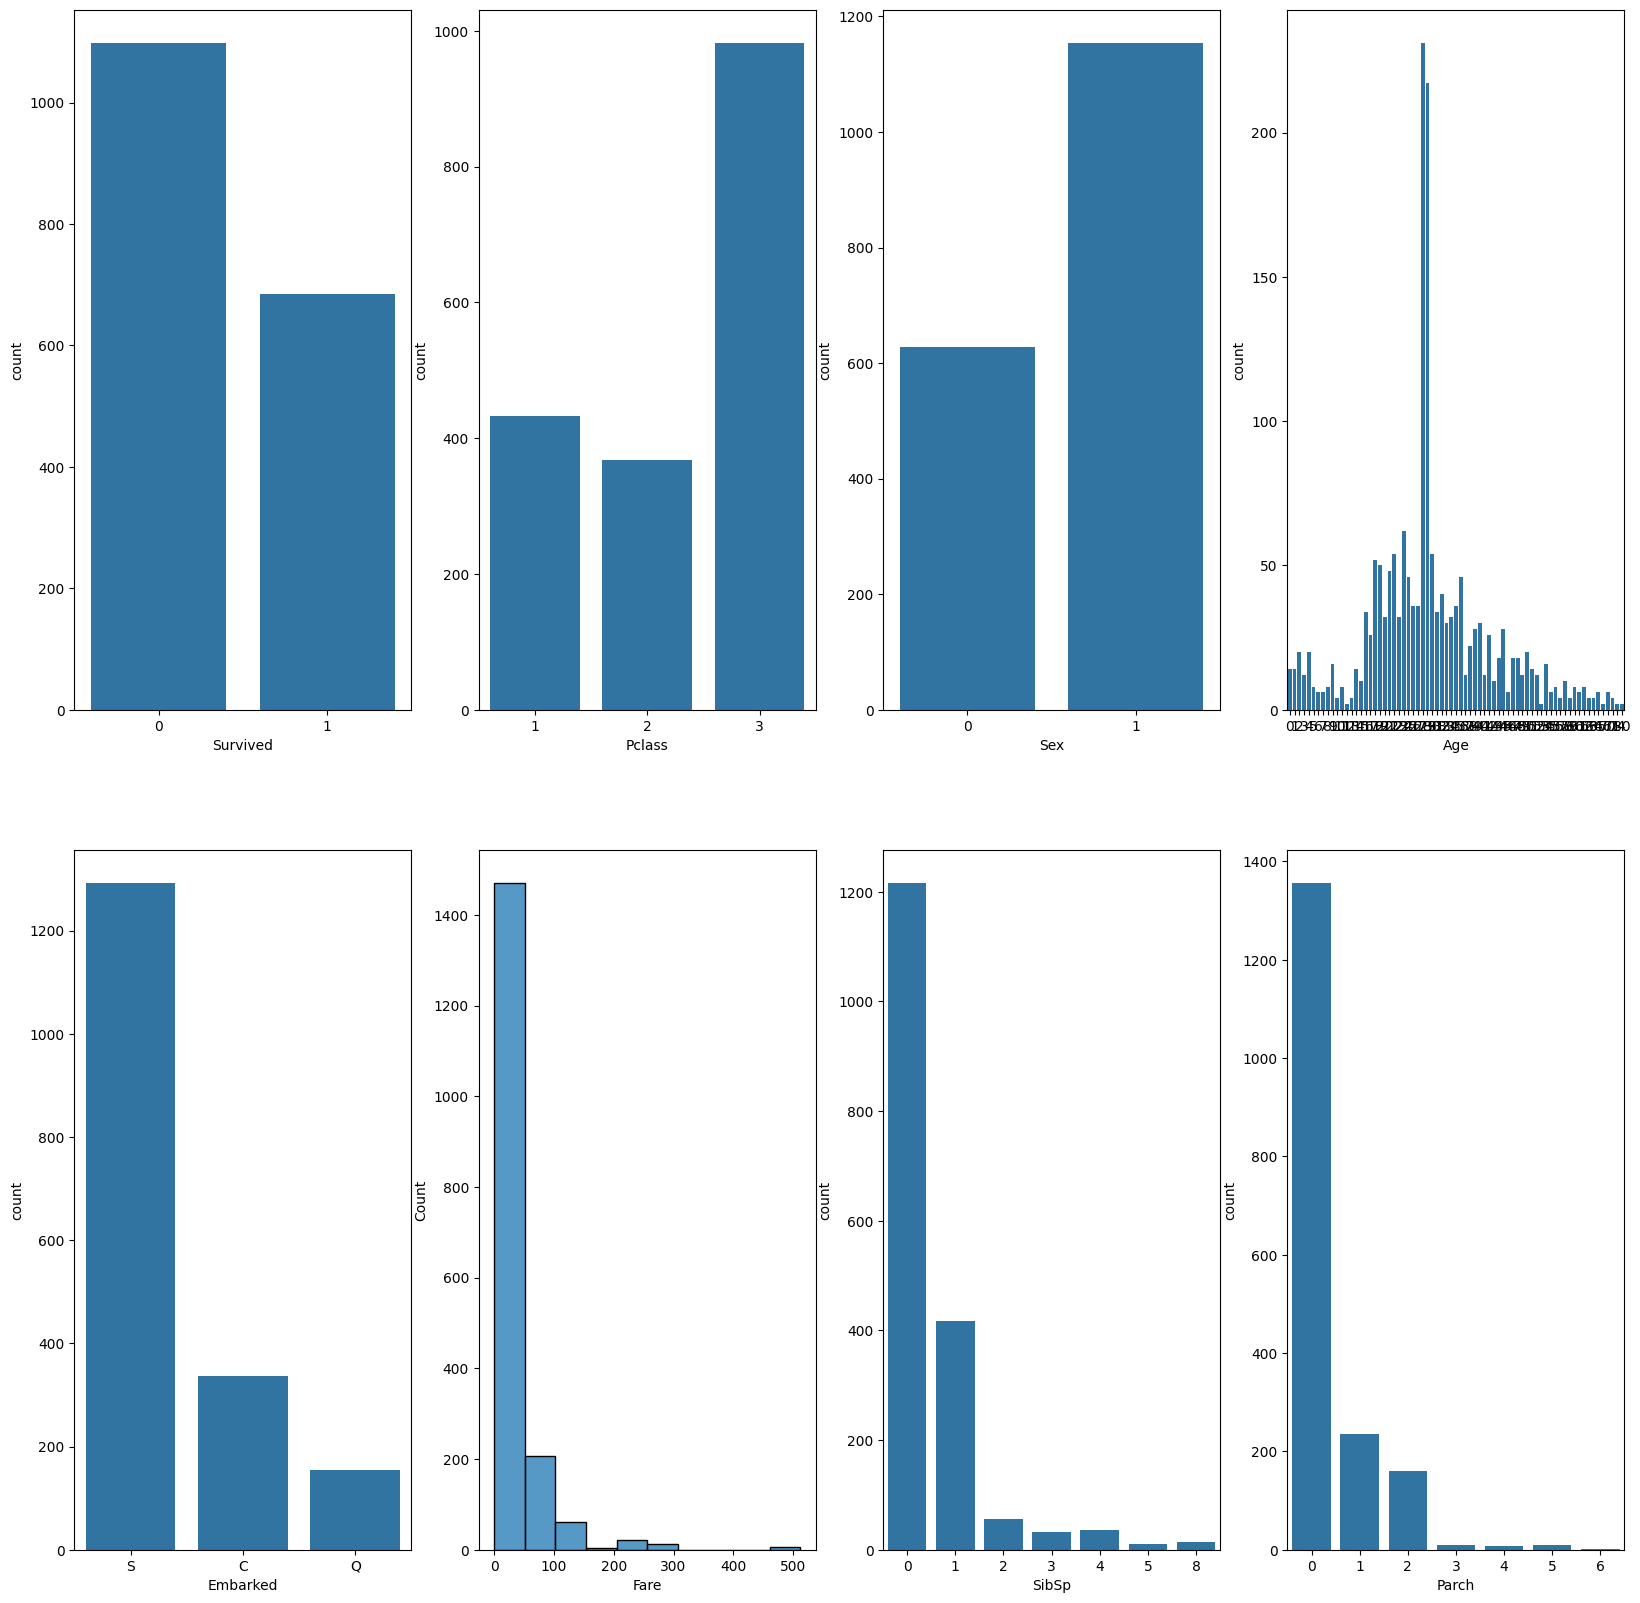

In [201]:
plt.figure(figsize=(20,20))
fig,ax=plt.subplots(2,4,figsize=(20,20))
sns.countplot(x="Survived",data=data1,ax=ax[0,0])
sns.countplot(x = 'Pclass', data = data1, ax=ax[0,1])
sns.countplot(x = 'Sex', data = data1, ax=ax[0,2])
sns.countplot(x = 'Age', data = data1, ax=ax[0,3])
sns.countplot(x = 'Embarked', data = data1, ax=ax[1,0])
sns.histplot(x = 'Fare', data= data1, bins=10, ax=ax[1,1])
sns.countplot(x = 'SibSp', data = data1, ax=ax[1,2])
sns.countplot(x = 'Parch', data = data1, ax=ax[1,3])

In [202]:
## Ensure the Age column is numeric and handle non-numeric entries
data1['Age'] = pd.to_numeric(data1['Age'], errors='coerce')

In [203]:
# creating age groups - young (0-18), adult(18-30), middle aged(30-50), old (50-100)
data1['Age'] = pd.cut(x=data1['Age'], bins=[0, 5, 20, 30, 40, 50, 60, 100], labels = ['Infant', 'Teen', '20s', '30s', '40s', '50s', 'Elder'])

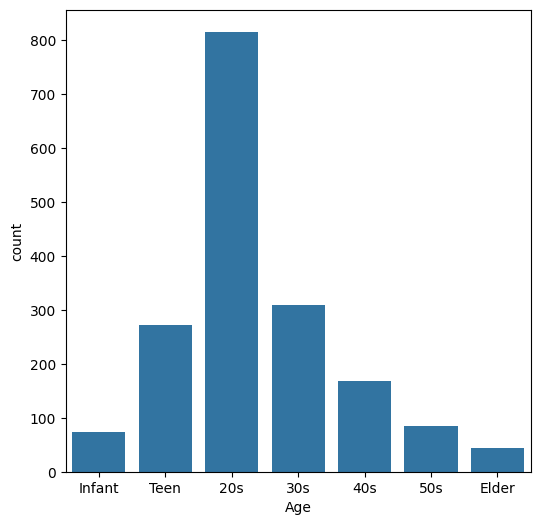

In [204]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Age', data = data1)
plt.show()

## Visualizing the relation between features

<Axes: xlabel='Pclass', ylabel='Survived'>

<Figure size 2000x2000 with 0 Axes>

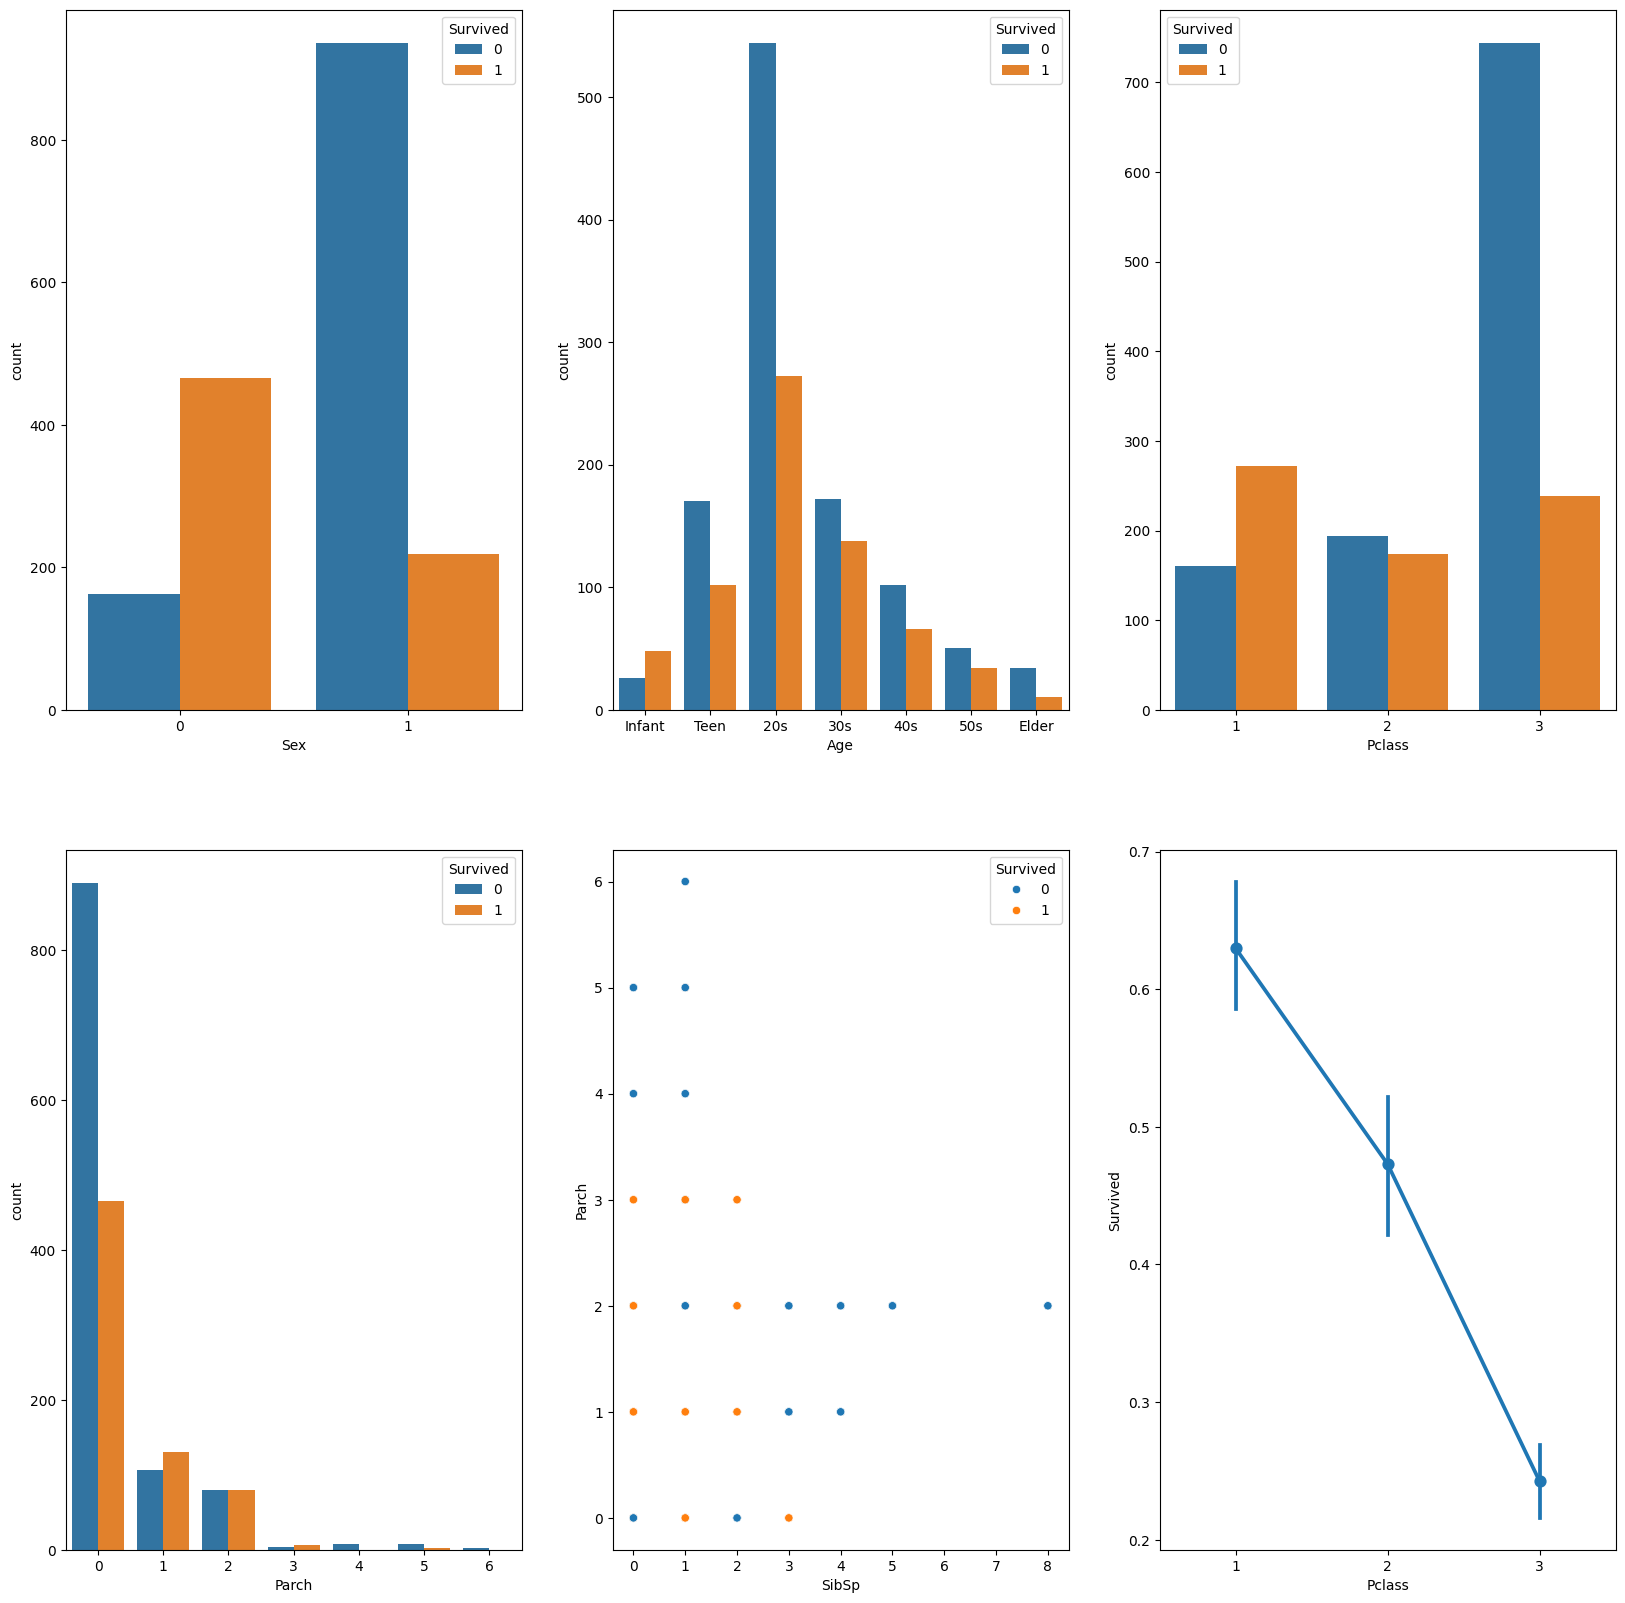

In [205]:
plt.figure(figsize=(20,20))
fig,ax=plt.subplots(2,3,figsize=(20,20))
sns.countplot(x = 'Sex', data = data1, hue = 'Survived', ax= ax[0,0])
sns.countplot(x = 'Age', data = data1, hue = 'Survived', ax=ax[0,1])
sns.countplot(x= "Pclass",data = data1, hue="Survived", ax=ax[0,2])
sns.countplot(x = 'Parch', data = data1, hue = 'Survived', ax=ax[1,0])
sns.scatterplot(x = 'SibSp', y = 'Parch', data = data1, hue = 'Survived', ax=ax[1,1])
sns.pointplot(x = 'Pclass', y = 'Survived', data = data1, ax=ax[1,2])


## Data Preprocessing

#### Use LabelEncoder to encoding categorical data to Numeric

In [206]:
from sklearn.preprocessing import LabelEncoder

In [207]:
le = LabelEncoder()
data1["Embarked"] = le.fit_transform(data1["Embarked"])


In [208]:
data1.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex               int64
Age            category
SibSp             int64
Parch             int64
Fare              int32
Embarked          int32
dtype: object

In [209]:
# Here could not convert string to float, so we do mapping

In [210]:
age_mapping = {
    'infant': 0,
    'teen': 1,
    '20s': 2,
    '30s': 3,
    '40s': 4,
    '50s': 5,
    'elder': 6}
data1['Age'] = data1['Age'].map(age_mapping)
data1.dropna(subset=['Age'], axis= 0)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,2.0,1,0,7,2
1,2,1,1,0,3.0,1,0,71,0
2,3,1,3,0,2.0,0,0,7,2
3,4,1,1,0,3.0,1,0,53,2
4,5,0,3,1,3.0,0,0,8,2
...,...,...,...,...,...,...,...,...,...
1776,1777,0,3,0,3.0,0,5,29,1
1777,1778,0,2,1,2.0,0,0,13,2
1779,1780,0,3,0,2.0,1,2,23,2
1780,1781,1,1,1,2.0,0,0,30,0


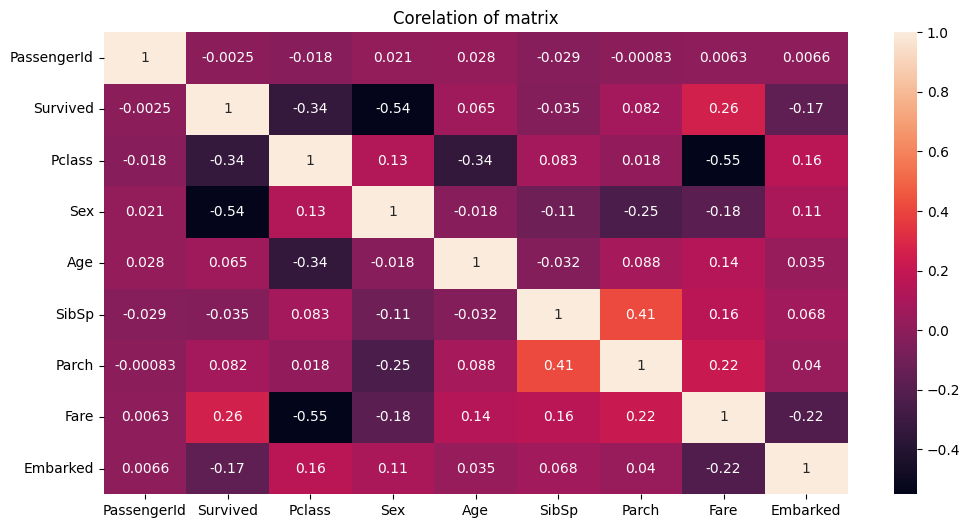

In [211]:
plt.figure(figsize=(12,6))
sns.heatmap(data1.corr(),annot = True,color="Blue")
plt.title("Corelation of matrix")
plt.show()

#### Separating the target and independent variable

In [212]:
x = data1.drop("Survived",axis=1)
y = data1["Survived"]

#### Split the data

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=10)

## Decesion tree 

In [215]:
from sklearn.tree import DecisionTreeClassifier

In [216]:
modelDT = DecisionTreeClassifier()

In [217]:
from sklearn.preprocessing import StandardScaler

In [218]:
scale = StandardScaler()
x_scale = scale.fit_transform(x_train)
x_test_scale =scale.fit_transform(x_test)

#### Train model

In [219]:
modelDT.fit(x_train,y_train)

DecisionTreeClassifier()

#### Check Training accuracy

In [220]:
train_pred = modelDT.predict(x_train)

In [221]:
from sklearn.metrics import accuracy_score

In [222]:
accuracy_score(train_pred,y_train)

0.9983961507618284

## KNeighborsClassifier

In [223]:
from sklearn.neighbors import KNeighborsClassifier

In [224]:
modelKNN = KNeighborsClassifier(n_neighbors = 3)

In [225]:
scale = StandardScaler()
x_scale = scale.fit_transform(x_train)

#### Train model

#### Before training there is problem on data scaling 

In [226]:
np.isnan(x_scale).sum() # These checks ensure there are no hidden NaNs

287

In [227]:
np.isinf(x_scale).sum()

0

In [228]:
# # Replace NaNs or Infinities with zero
x_train_scaled = np.nan_to_num(x_scale, nan=0.0, posinf=0.0, neginf=0.0) 

In [229]:
modelKNN.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

#### Calculate Training accuracy

In [230]:
Train_pred = modelKNN.predict(x_train_scaled)

In [231]:
accuracy_score(Train_pred,y_train)

0.8740978348035284

## Logistics regression

In [232]:
from sklearn.linear_model import LogisticRegression

In [233]:
modelLR = LogisticRegression()

In [234]:
scale = StandardScaler()
x_scale = scale.fit_transform(x_train)

In [235]:
 np.isnan(x_scale).sum() # These checks ensure there are no hidden NaNs

287

In [236]:
np.isinf(x_scale).sum()

0

In [237]:
# # Replace NaNs or Infinities with zero
x_train_scaled = np.nan_to_num(x_scale, nan=0.0, posinf=0.0, neginf=0.0) 

#### Train model

In [238]:
modelLR.fit(x_train_scaled,y_train)

LogisticRegression()

#### Check training accuracy

In [239]:
train_pred = modelLR.predict(x_train_scaled)

In [240]:
accuracy_score(train_pred,y_train)

0.7995188452285485

## SVM

In [241]:
from sklearn.svm import SVC

In [242]:
modelSVM = SVC(probability=True)

In [243]:
scale = StandardScaler()
x_scale = scale.fit_transform(x_train)

In [244]:
np.isnan(x_scale).sum() # These checks ensure there are no hidden NaNs

287

In [245]:
# # Replace NaNs or Infinities with zero
x_train_scaled = np.nan_to_num(x_scale, nan=0.0, posinf=0.0, neginf=0.0) 

In [246]:
modelSVM.fit(x_train_scaled,y_train)

SVC(probability=True)

#### Check Traininig accuracy

In [247]:
train_pred = modelSVM.predict(x_train_scaled)

In [248]:
accuracy_score(train_pred,y_train)

0.8243785084202085

## Random forest classifier

In [249]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier,AdaBoostClassifier

In [250]:
modelRFC = RandomForestClassifier(n_estimators=100)

In [251]:
modelRFC.fit(x_train,y_train)

RandomForestClassifier()

In [252]:
train_pred = modelRFC.predict(x_train)

In [253]:
accuracy_score(train_pred,y_train)

1.0

## VotingClassifier

In [254]:
from sklearn.ensemble import VotingClassifier

In [255]:
Voting_clf = VotingClassifier(estimators=[
                 ("DT",modelDT),
                 ("KNN",modelKNN),
                 ("LR",modelLR),
                 ("SVM",modelSVM),
                 ("RFC",modelRFC)
            ],voting="soft")

In [256]:
scale = StandardScaler()
x_scale = scale.fit_transform(x_train)

In [257]:
np.isnan(x_scale).sum() # These checks ensure there are no hidden NaNs

287

In [258]:
# # Replace NaNs or Infinities with zero
x_train_scaled = np.nan_to_num(x_scale, nan=0.0, posinf=0.0, neginf=0.0) 

In [259]:
Voting_clf.fit(x_train_scaled,y_train)

VotingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier(n_neighbors=3)),
                             ('LR', LogisticRegression()),
                             ('SVM', SVC(probability=True)),
                             ('RFC', RandomForestClassifier())],
                 voting='soft')

In [260]:
train_pred = Voting_clf.predict(x_train_scaled)

In [261]:
accuracy_score(train_pred,y_train)

0.9470729751403368

## BaggingClassifier

In [262]:
from sklearn.ensemble import BaggingClassifier

In [263]:
Bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,random_state=42)

In [264]:
Bagging_clf.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [265]:
train_pred = Bagging_clf.predict(x_train)

In [266]:
accuracy_score(train_pred,y_train)

1.0

## AdaBoostClassifier

In [267]:
from sklearn.ensemble import AdaBoostClassifier

In [274]:
boosting_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,algorithm="SAMME",random_state=42)

In [275]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [276]:
imputer = SimpleImputer(strategy='mean')

In [277]:
Boosting_clf = Pipeline(steps=[
    ('imputer', imputer),
    ('classifier', AdaBoostClassifier(estimator=DecisionTreeClassifier(),algorithm="SAMME"))
])

In [278]:
Boosting_clf.fit(x_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=DecisionTreeClassifier()))])

In [279]:
train_pred = Boosting_clf.predict(x_train)

In [280]:
accuracy_score(train_pred,y_train)

1.0

## Now we predict tesing data 

## Decesion tree 

In [281]:
Prediction = modelDT.predict(x_test)

In [282]:
accuracy_score(Prediction,y_test)

0.7962616822429907

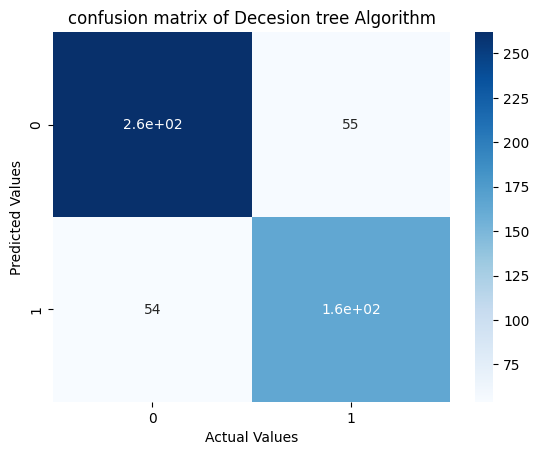

In [283]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Prediction,y_test),annot= True, cmap = 'Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix of Decesion tree Algorithm')
plt.show()

## KNeighborsClassifier

In [284]:
scale = StandardScaler()
x_scale = scale.fit_transform(x_test)

In [285]:
x_test_scaled = np.nan_to_num(x_scale, nan=0.0, posinf=0.0, neginf=0.0) 

In [286]:
Prediction = modelKNN.predict(x_test_scaled)

In [287]:
accuracy_score(Prediction,y_test)

0.7906542056074767

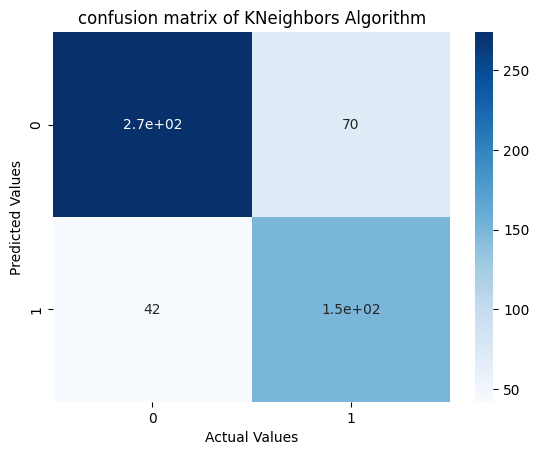

In [288]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Prediction,y_test),annot= True, cmap = 'Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix of KNeighbors Algorithm')
plt.show()

## Logistics Regression

In [289]:
scale = StandardScaler()
x_scale = scale.fit_transform(x_test)

In [290]:
x_test_scaled = np.nan_to_num(x_scale, nan=0.0, posinf=0.0, neginf=0.0)

In [291]:
Prediction = modelLR.predict(x_test_scaled)

In [292]:
accuracy_score(Prediction,y_test)

0.8037383177570093

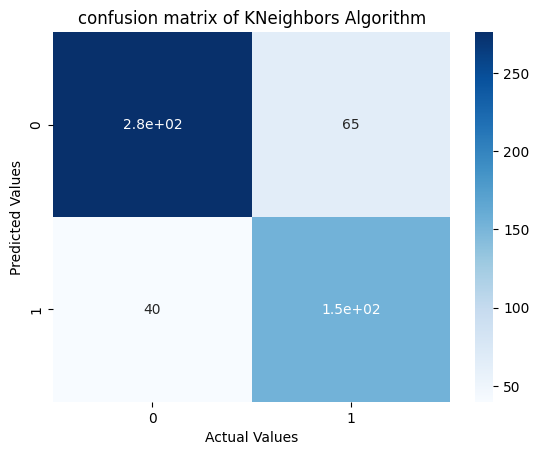

In [293]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Prediction,y_test),annot= True, cmap = 'Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix of KNeighbors Algorithm')
plt.show()

## Support vector machine

In [294]:
scale = StandardScaler()
x_scale = scale.fit_transform(x_test)

In [295]:
x_test_scaled = np.nan_to_num(x_scale, nan=0.0, posinf=0.0, neginf=0.0)

In [296]:
Prediction = modelSVM.predict(x_test_scaled)

In [297]:
accuracy_score(Prediction,y_test)

0.8186915887850468

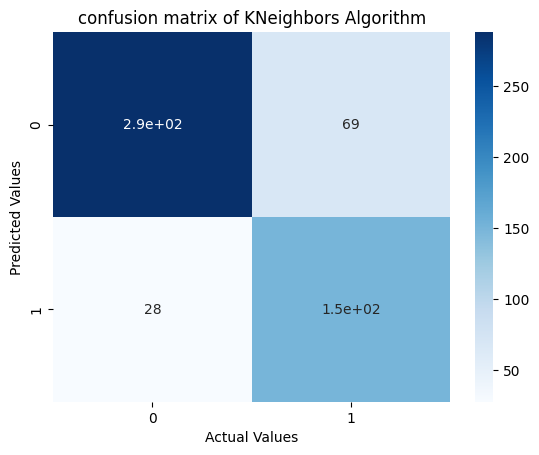

In [298]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Prediction,y_test),annot= True, cmap = 'Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix of KNeighbors Algorithm')
plt.show()

## RandomForestClassifier

In [299]:
test_pred = modelRFC.predict(x_test)

In [300]:
 accuracy_score(Prediction,y_test)

0.8186915887850468

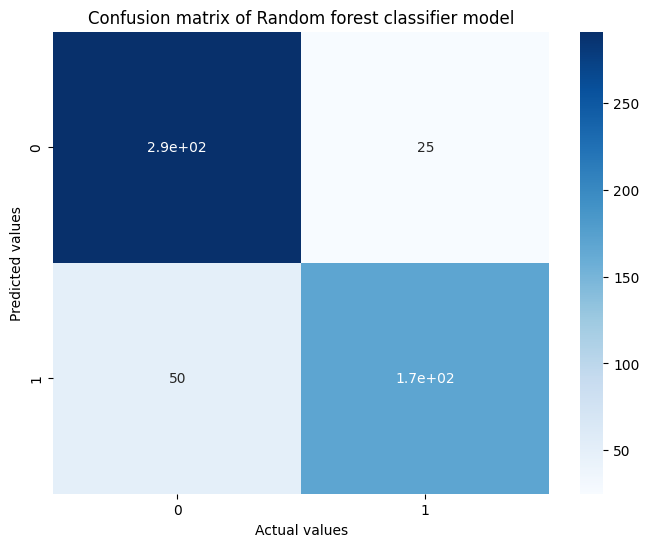

In [301]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,cmap="Blues")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Confusion matrix of Random forest classifier model")
plt.show()

## VotingClassifier

In [302]:
scale = StandardScaler()
x_scale = scale.fit_transform(x_test)

In [303]:
x_test_scaled = np.nan_to_num(x_scale, nan=0.0, posinf=0.0, neginf=0.0)

In [304]:
Prediction = Voting_clf.predict(x_test_scaled)

In [305]:
accuracy_score(Prediction,y_test)

0.8242990654205608

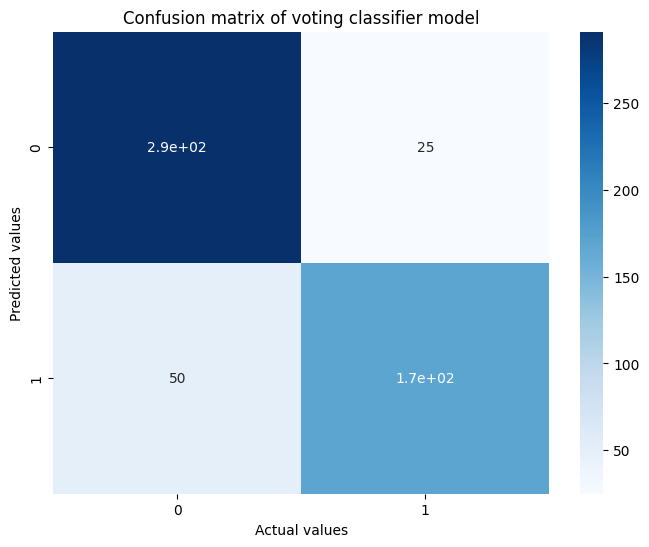

In [306]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,cmap="Blues")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Confusion matrix of voting classifier model")
plt.show()

## BaggingClassifier

In [307]:
Prediction = Bagging_clf.predict(x_test)

In [308]:
accuracy_score(Prediction,y_test)

0.8523364485981308

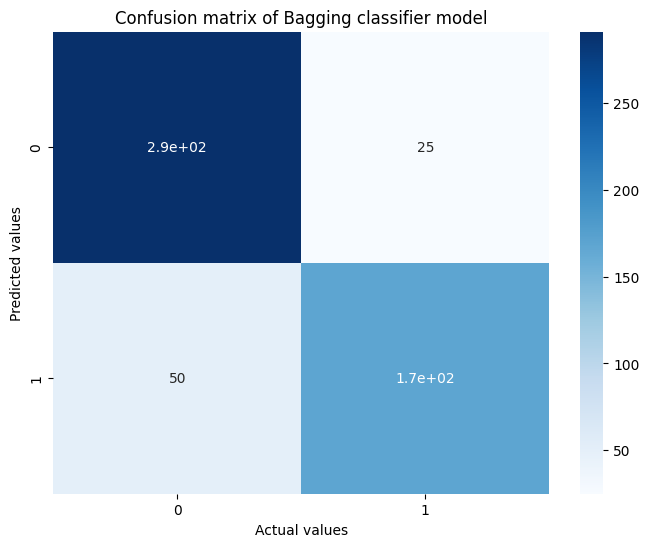

In [309]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,cmap="Blues")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Confusion matrix of Bagging classifier model")
plt.show()

## AdaBoostClassifier

In [310]:
Prediction = Boosting_clf.predict(x_test)

In [311]:
accuracy_score(Prediction,y_test)

0.7906542056074767

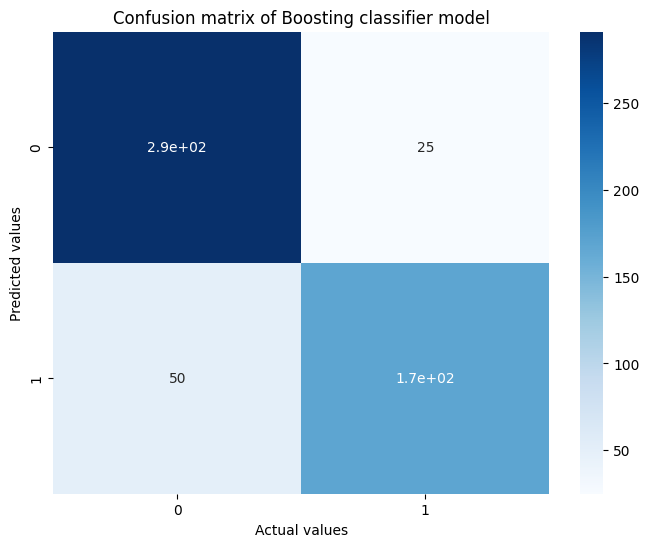

In [313]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,cmap="Blues")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Confusion matrix of Boosting classifier model")
plt.show()

## Summary 

## Titanic Survival Case Study Summary

In this case study, various classification algorithms were employed to predict survival outcomes for passengers aboard the Titanic. Below are the results of training and testing accuracies for each algorithm:

| Algorithm                    | Training Accuracy | Testing Accuracy |
|------------------------------|-------------------|------------------|
| 1) Decision Tree              | 0.99              | 0.78             |
| 2) K-Neighbors Classifier     | 0.87              | 0.79             |
| 3) Logistic Regression        | 0.79              | 0.80             |
| 4) Support Vector Machine     | 1.00              | 0.81             |
| 5) Random Forest Classifier   | 1.00              | 0.78             |
| 6) Voting Classifier          | 0.94              | 0.82             |
| 7) Bagging Classifier         | 1.00              | 0.85             |
| 8) AdaBoost Classifier        | 1.00              | 0.79             |

### Insights:

- **Overfitting**: The Decision Tree and Random Forest classifiers exhibited high training accuracies of 0.99 and 1.00, respectively, but their testing accuracies were relatively lower (0.78). This indicates potential overfitting, where the model learns the training data too well but fails to generalize to unseen data.

- **Balanced Performance**: Logistic Regression achieved a training accuracy of 0.79 and a testing accuracy of 0.80, indicating a more balanced performance across the datasets. This suggests that the model may generalize better to unseen data compared to more complex models.

- **Strong Ensemble Methods**: The Voting Classifier (testing accuracy: 0.82) and Bagging Classifier (0.85) outperformed many individual classifiers. These ensemble methods combine multiple algorithms to improve predictive performance, demonstrating their effectiveness in handling the complexities of the dataset.

- **SVM Efficacy**: The Support Vector Machine showed excellent training accuracy (1.00) and a respectable testing accuracy of 0.81, indicating its effectiveness in capturing the decision boundary for survival prediction.

### Conclusion:

The study demonstrates the strengths and weaknesses of various classification algorithms in predicting Titanic survival. While more complex models like Decision Trees and Random Forests may excel on training data, simpler models like Logistic Regression and ensemble methods like Voting and Bagging Classifiers tend to provide better generalization to unseen data. Further tuning and cross-validation may be necessary to optimize model performance.
